<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/19.%20Machine%20Learning/Learn%20-%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learn - Regression
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)

___

# Importing Libraries

In [144]:
# basic
import pandas as pd
import numpy as np
import scipy.stats as stats

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Reading Dataset
Dataset from Kaggle, download [here](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [86]:
path = 'https://raw.githubusercontent.com/ganjar87/data_science_practice/main/kc_house_data.csv'

data = pd.read_csv(path)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [87]:
data.duplicated().sum()

0

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [90]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [91]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


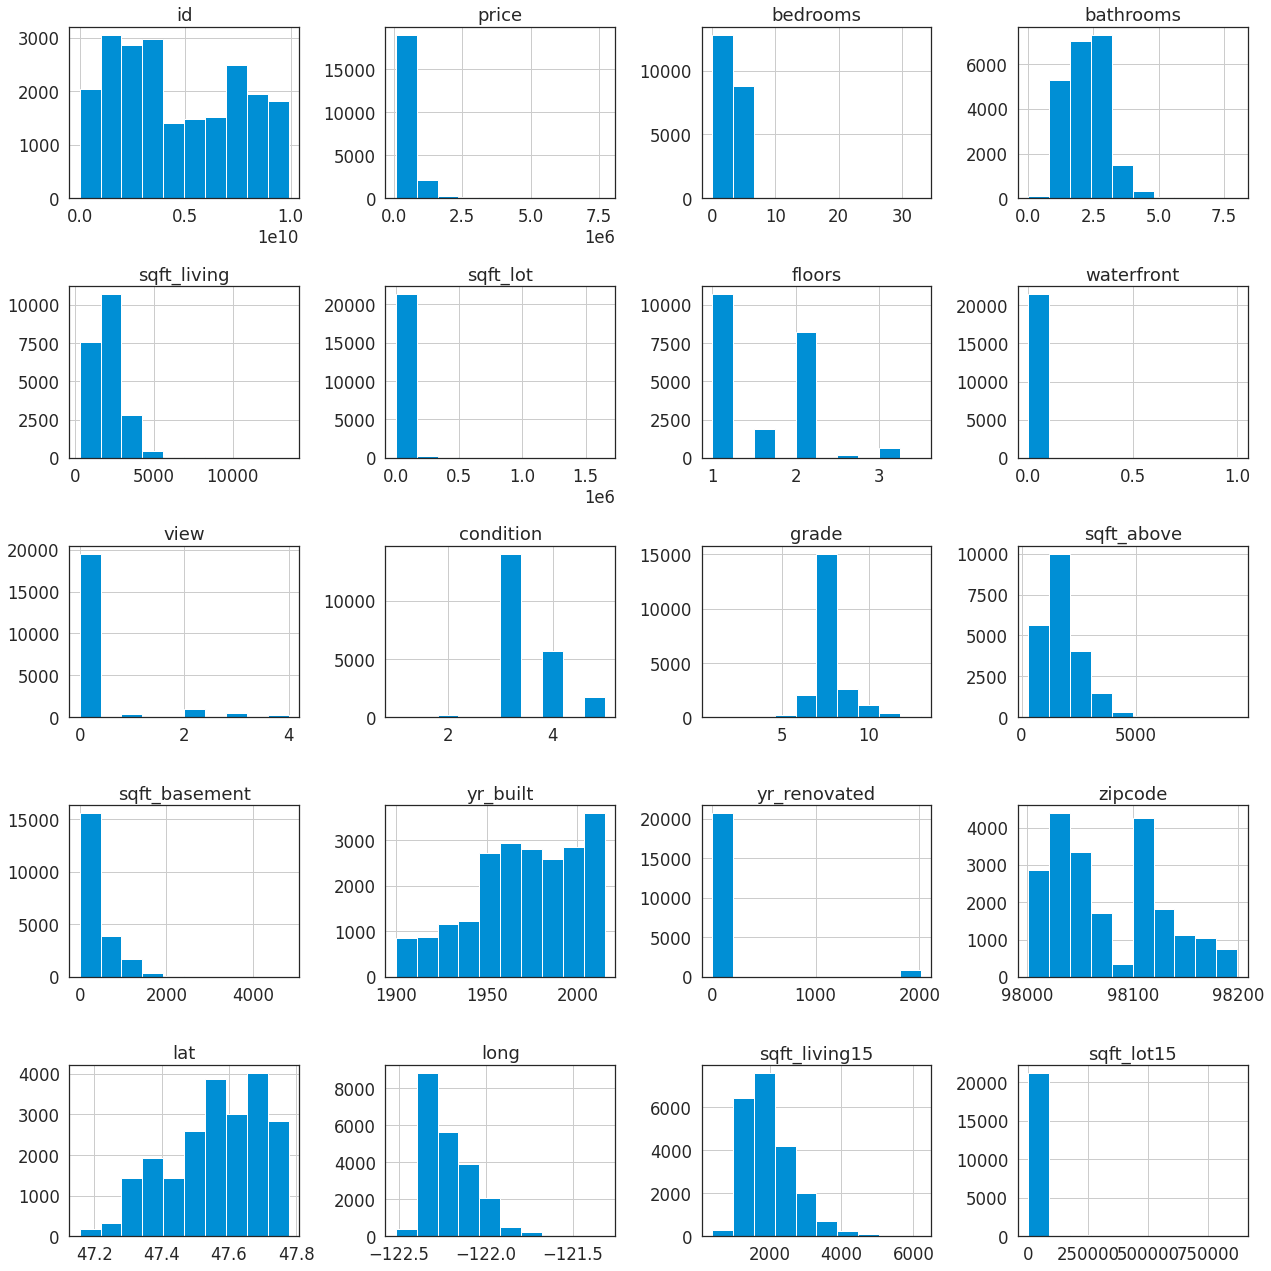

In [92]:
data.hist(figsize=(18,18))

plt.tight_layout()
plt.show()

In [93]:
data.drop(['id', 'date'], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Preprocessing

## Train - Test Split

In [94]:
data_X = data.drop(['price'], axis=1)
data_y = data['price']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1)

## Feature Scaling
Since this dataset is not in normal distribution, I will use min-max scaling for the numerical features.

In [96]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

for i in data_X.columns:
  scaler_x = MinMaxScaler()
  scaler_x.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler_x.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler_x.transform(X_test_scale[[i]])

In [97]:
y_train_scale = y_train.copy()
y_test_scale = y_test.copy()

scaler_y = MinMaxScaler()
scaler_y.fit(pd.DataFrame(y_train_scale))

y_train_scale = scaler_y.transform(pd.DataFrame(y_train_scale))
y_test_scale = scaler_y.transform(pd.DataFrame(y_test_scale))

# Linear Regression

## Training Model

In [98]:
model_lr = LinearRegression()
model_lr.fit(X_train_scale, y_train_scale)

LinearRegression()

## Making Prediction

In [99]:
y_pred = model_lr.predict(X_test_scale)

### Scaled Prediction

In [100]:
y_test_scale[:5]

array([[0.06988171],
       [0.06733394],
       [0.17870792],
       [0.11962693],
       [0.02911738]])

In [101]:
y_pred[:5]

array([[0.10260921],
       [0.07334277],
       [0.11384047],
       [0.11622773],
       [0.02840931]])

### Unscaled Prediction

In [111]:
y_test[:5]

15544     459000.0
17454     445000.0
21548    1057000.0
3427      732350.0
8809      235000.0
Name: price, dtype: float64

In [110]:
scaler_y.inverse_transform(y_pred[:5])

array([[638837.61817992],
       [478018.50355407],
       [700553.38060743],
       [713671.35485061],
       [231109.14120284]])

In [112]:
model_lr.coef_

array([[-0.19442686,  0.04616554,  0.1177266 ,  0.02783441,  0.00441928,
         0.10251391,  0.03760834,  0.01945586,  0.17334104,  0.12284808,
         0.06458329, -0.05324259,  0.00800823, -0.01992376,  0.06946601,
        -0.04504394,  0.01889197, -0.04936808]])

## Model Evaluation

### Pearson's Correlation Coefficient

In [121]:
r = stats.pearsonr(y_test_scale.flatten(), y_pred.flatten())
r_squared = r[0]*r[0]

print('Pearson\'s correlation coefficient\t:', r[0].round(5))
print('Correlation of Determination\t\t:', r_squared.round(5))

Pearson's correlation coefficient	: 0.8325
Correlation of Determination		: 0.69305


### Correlation of Determination

#### Feature & Target

In [120]:
print('R-squared of training set\t:', model_lr.score(X_train_scale, y_train_scale).round(5))
print('R-squared of testing set\t:', model_lr.score(X_test_scale, y_test_scale).round(5))

R-squared of training set	: 0.70392
R-squared of testing set	: 0.69048


#### Actual and Prediction

In [122]:
print('R-squared\t:', r2_score(y_test_scale, y_pred).round(5))

R-squared	: 0.69048


### Mean Squared Error

In [124]:
mse = mean_squared_error(y_test_scale, y_pred)
rmse = np.sqrt(mse)

print('MSE\t:', mse.round(5))
print('RMSE\t:', rmse.round(5))

MSE	: 0.0016
RMSE	: 0.04


# Lasso Regularization
I don't know why, but I can't use lasso on the scaled features. If I use the scaled features, it will give $R^2=0$

In [142]:
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(X_train, y_train)

y_pred = model_lasso.predict(X_test)

print('R-squared of training set\t:', model_lasso.score(X_train, y_train).round(5))
print('R-squared of testing set\t:', model_lasso.score(X_test, y_test).round(5))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('\n')
print('MSE\t:', mse.round(5))
print('RMSE\t:', rmse.round(5))

R-squared of training set	: 0.70392
R-squared of testing set	: 0.69048


MSE	: 48307044244.98891
RMSE	: 219788.63539


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.563e+14, tolerance: 1.901e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


# Ridge Regularization

In [149]:
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X_train_scale, y_train_scale)

y_pred = model_ridge.predict(X_test_scale)

print('R-squared of training set\t:', model_ridge.score(X_train_scale, y_train_scale).round(5))
print('R-squared of testing set\t:', model_ridge.score(X_test_scale, y_test_scale).round(5))

mse = mean_squared_error(y_test_scale, y_pred)
rmse = np.sqrt(mse)

print('\n')
print('MSE\t:', mse.round(5))
print('RMSE\t:', rmse.round(5))

R-squared of training set	: 0.7039
R-squared of testing set	: 0.69019


MSE	: 0.0016
RMSE	: 0.04002


# Decision Tree Regressor

In [152]:
model_rf = DecisionTreeRegressor()
model_rf.fit(X_train_scale, y_train_scale.flatten())

y_pred = model_rf.predict(X_test_scale)

print('R-squared of training set\t:', model_rf.score(X_train_scale, y_train_scale.flatten()).round(5))
print('R-squared of testing set\t:', model_rf.score(X_test_scale, y_test_scale.flatten()).round(5))

mse = mean_squared_error(y_test_scale, y_pred)
rmse = np.sqrt(mse)

print('\n')
print('MSE\t:', mse.round(5))
print('RMSE\t:', rmse.round(5))

R-squared of training set	: 0.99933
R-squared of testing set	: 0.77643


MSE	: 0.00116
RMSE	: 0.03399


# Random Forest Regressor

In [151]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scale, y_train_scale.flatten())

y_pred = model_rf.predict(X_test_scale)

print('R-squared of training set\t:', model_rf.score(X_train_scale, y_train_scale.flatten()).round(5))
print('R-squared of testing set\t:', model_rf.score(X_test_scale, y_test_scale.flatten()).round(5))

mse = mean_squared_error(y_test_scale, y_pred)
rmse = np.sqrt(mse)

print('\n')
print('MSE\t:', mse.round(5))
print('RMSE\t:', rmse.round(5))

R-squared of training set	: 0.98207
R-squared of testing set	: 0.86504


MSE	: 0.0007
RMSE	: 0.02641
